In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


## Loading the final preprocessed trained dataset


In [2]:
#loading the train set
full_cleaned_final=pd.read_csv('full_cleaned_final.csv')
full_cleaned_final


,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,...,scale__hydro_consumption,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
0,2173,0.000000,0.002580,0.000000,0.000000,0.000000,0.000007,0.000000,0.000024,0.001192,...,0.000000,0.004071,0.000000,0.005523,0.000000,0.000000,Cameroon,2000,CMR,1137.624523
1,2203,0.002118,0.021555,0.000000,0.000061,0.000315,0.008956,0.038944,0.005768,0.012196,...,0.024342,0.040952,0.003846,0.018784,0.000000,0.000335,Argentina,2000,ARG,10672.722035
2,1545,0.000411,0.124142,0.000000,0.000000,0.031057,0.097226,0.574881,0.072461,0.100233,...,0.139771,0.101075,0.000189,0.027310,0.000000,0.000000,Russia,2000,RUS,5323.662598
3,2199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000004,0.000000,...,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,Guinea-Bissau,2000,GNB,563.624309
4,906,0.001000,0.023364,0.000000,0.000046,0.006992,0.016567,0.000728,0.013143,0.010895,...,0.026304,0.034533,0.001050,0.011772,0.000000,0.000145,Turkey,2000,TUR,6454.593119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,856,0.046783,0.000015,0.006085,0.028889,0.000678,0.000981,0.000000,0.001347,0.010105,...,0.000000,0.104202,0.535270,0.000083,0.312740,1.000000,Denmark,2022,DNK,56386.120691
3344,2052,0.057847,0.000053,0.053027,0.031299,0.002957,0.012248,0.000000,0.009443,0.018171,...,0.000000,0.122527,0.221656,0.000097,0.912642,0.362842,Netherlands,2022,NLD,47301.904915
3345,728,0.082327,0.010607,0.000917,0.017068,0.000556,0.001376,0.000000,0.002061,0.022573,...,0.000000,0.232370,1.000000,0.061844,0.050052,0.627229,Finland,2022,FIN,45361.232992
3346,1954,0.040134,0.014224,0.100214,0.094341,0.001427,0.018873,0.000000,0.013405,0.062471,...,0.000000,0.106644,0.056794,0.009662,0.636974,0.403901,Spain,2022,ESP,26748.793053


## Loading the test set

In [3]:
#Loading the test set
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv')
full_cleaned_final_test

,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,...,scale__hydro_consumption,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
0,0,0.000000,0.002587,0.000030,0.0,0.000000,0.000978,0.000000,0.000851,0.001199,...,0.002854,0.008083,0.000000,0.004249,0.000470,0.0,Sri Lanka,2005,LKA,2348.033855
1,1,0.000117,0.000711,0.000000,0.0,0.000000,0.000228,0.000440,0.000199,0.000336,...,0.000000,0.019121,0.003797,0.011013,0.000000,0.0,Gabon,2016,GAB,7038.577254
2,2,0.000000,0.004449,0.000030,0.0,0.001779,0.001709,0.000000,0.001734,0.002059,...,0.000000,0.077294,0.000000,0.040244,0.002588,0.0,Bosnia and Herzegovina,2014,BIH,4403.653938
3,3,0.018890,0.004048,0.000061,0.0,0.005310,0.025199,0.036090,0.017277,0.003000,...,0.004275,0.039205,0.018622,0.001915,0.000271,0.0,Thailand,2010,THA,5082.256116
4,4,0.000000,0.001210,0.000000,0.0,0.000000,0.000715,0.001837,0.000450,0.000559,...,0.000000,0.004739,0.000000,0.001852,0.000000,0.0,Cote d'Ivoire,2010,CIV,1640.315029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,833,0.000058,0.000053,0.000000,0.0,0.000000,0.000016,0.000000,0.000013,0.000028,...,0.000000,0.010797,0.014125,0.006102,0.000000,0.0,Belize,2005,BLZ,6301.915865
834,834,0.000000,0.000265,0.000000,0.0,0.000635,0.001038,0.000000,0.000864,0.000122,...,0.000000,0.029399,0.000000,0.002281,0.000000,0.0,Moldova,2009,MDA,2102.710936
835,835,0.000000,0.000424,0.000000,0.0,0.000000,0.000059,0.000023,0.000052,0.000196,...,0.000000,0.000673,0.000000,0.000581,0.000000,0.0,Afghanistan,2004,AFG,354.033913
836,836,0.000000,0.004108,0.000061,0.0,0.000000,0.000505,0.000000,0.000459,0.001906,...,0.000000,0.005573,0.000000,0.005010,0.000698,0.0,Cameroon,2020,CMR,1419.328204


In [4]:
len(full_cleaned_final.columns)

24

## Best features


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
X = full_cleaned_final.iloc[:,0:20]  #independent columns
y = full_cleaned_final.iloc[:,-1]


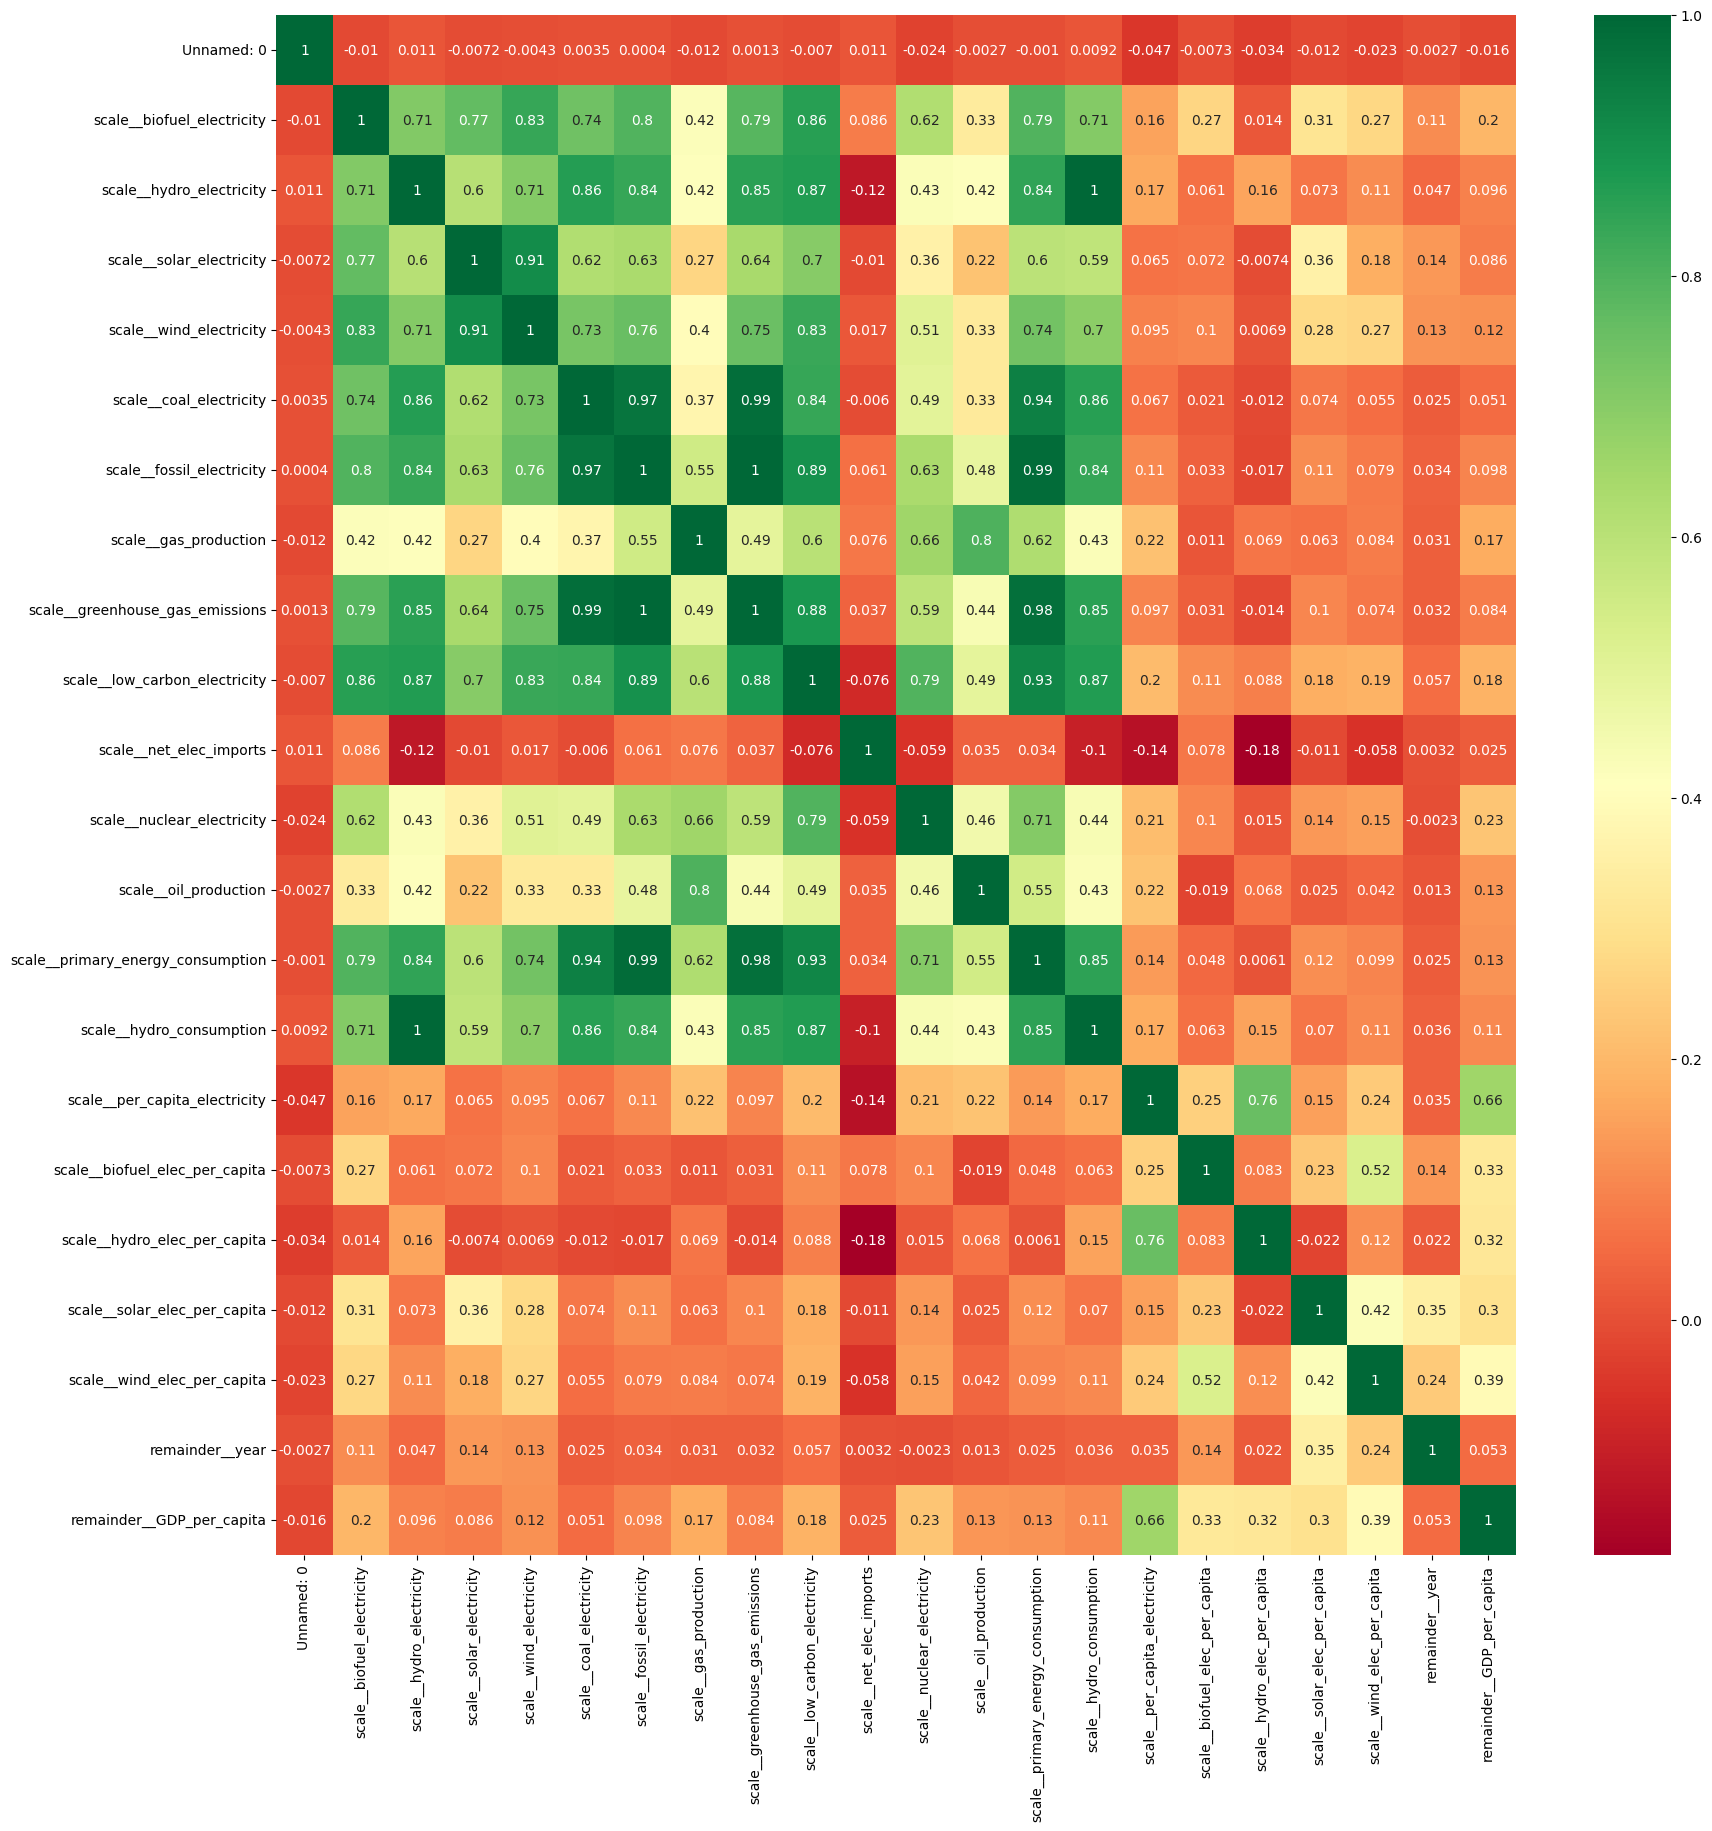

In [7]:
corrmat = full_cleaned_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_cleaned_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#full_cleaned_final['scale__all_renewable'] = np.array(full_cleaned_final['scale__biofuel_electricity'])-np.array(full_cleaned_final['scale__wind_electricity'])+2*np.array(full_cleaned_final['scale__gas_production'])

#full_cleaned_final_test['scale__all_renewable'] = np.array(full_cleaned_final_test['scale__biofuel_electricity'])-np.array(full_cleaned_final_test['scale__wind_electricity'])+2*np.array(full_cleaned_final_test['scale__gas_production'])

In [9]:
full_cleaned_final.columns

Index(['Unnamed: 0', 'scale__biofuel_electricity', 'scale__hydro_electricity',
       'scale__solar_electricity', 'scale__wind_electricity',
       'scale__coal_electricity', 'scale__fossil_electricity',
       'scale__gas_production', 'scale__greenhouse_gas_emissions',
       'scale__low_carbon_electricity', 'scale__net_elec_imports',
       'scale__nuclear_electricity', 'scale__oil_production',
       'scale__primary_energy_consumption', 'scale__hydro_consumption',
       'scale__per_capita_electricity', 'scale__biofuel_elec_per_capita',
       'scale__hydro_elec_per_capita', 'scale__solar_elec_per_capita',
       'scale__wind_elec_per_capita', 'remainder__country', 'remainder__year',
       'remainder__iso_code', 'remainder__GDP_per_capita'],
      dtype='object')

In [10]:
full_cleaned_final1 = full_cleaned_final.drop(columns=['Unnamed: 0','remainder__iso_code','remainder__year','remainder__country'])

In [11]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   scale__biofuel_electricity         3348 non-null   float64
 1   scale__hydro_electricity           3348 non-null   float64
 2   scale__solar_electricity           3348 non-null   float64
 3   scale__wind_electricity            3348 non-null   float64
 4   scale__coal_electricity            3348 non-null   float64
 5   scale__fossil_electricity          3348 non-null   float64
 6   scale__gas_production              3348 non-null   float64
 7   scale__greenhouse_gas_emissions    3348 non-null   float64
 8   scale__low_carbon_electricity      3348 non-null   float64
 9   scale__net_elec_imports            3348 non-null   float64
 10  scale__nuclear_electricity         3348 non-null   float64
 11  scale__oil_production              3348 non-null   float

In [12]:
full_cleaned_final1['remainder__GDP_per_capita']

0        1137.624523
1       10672.722035
2        5323.662598
3         563.624309
4        6454.593119
            ...     
3343    56386.120691
3344    47301.904915
3345    45361.232992
3346    26748.793053
3347    20575.123491
Name: remainder__GDP_per_capita, Length: 3348, dtype: float64

## Statistical inference

### Impact of Biofuel in GDP_Per_capita

In [13]:
# Checking the R-sqaured
#model1.rsquared

In [14]:
#model1.summary()

### Impact of biofuel_elec_per_capita on GDP

In [15]:
model_bio = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_elec_per_capita', data=full_cleaned_final1).fit()

print(model_bio.params)
model_bio.rsquared

Intercept                         11781.140572
scale__biofuel_elec_per_capita    73216.710494
dtype: float64


0.10679732616745252

### Impact of Oil_production in GDP_Per_capita

###  Net imports

In [16]:
model_elec_imports = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__net_elec_imports', data=full_cleaned_final1).fit()

print(model_elec_imports.params)
model_elec_imports.rsquared


Intercept                  9651.009491
scale__net_elec_imports    7547.491407
dtype: float64


0.0006234466133160366

### Fossil

### Gas production

### Impact of hydro_electricity on GDP

### Impact of hydro_elec_per_capita on GDP

In [17]:
model__hydro_elec_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_elec_per_capita', data=full_cleaned_final1).fit()

print(model__hydro_elec_per_capita.params)
model__hydro_elec_per_capita.rsquared

Intercept                       12101.676388
scale__hydro_elec_per_capita    69105.599105
dtype: float64


0.10192563127014387

### Impact of Solar_electricity on GDP

### Impact of solar_elec_per_capita on GDP

In [18]:
model_solar_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_elec_per_capita', data=full_cleaned_final).fit()

print(model_solar_per_capita.params)
model_solar_per_capita.rsquared
model_solar_per_capita.summary()

Intercept                       12040.983837
scale__solar_elec_per_capita    74862.488051
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.091
Model:                                   OLS   Adj. R-squared:                  0.091
Method:                        Least Squares   F-statistic:                     334.2
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):           3.08e-71
Time:                               17:34:05   Log-Likelihood:                -37536.
No. Observations:                       3348   AIC:                         7.508e+04
Df Residuals:                           3346   BIC:                         7.509e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.204e+04    322.403     37.348      0.000    1.14e+04    1.27e+04
scale__solar_elec_per_capita  7.486e+04   4095.060     18.281      0.000    6.68e+04    8.29e+04
==============================================================================
Omnibus:                     1501.510   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6616.277
Skew:                           2.211   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Wind_electricity on GDP

### Impact of wind_elec_per_capita on GDP

In [19]:
model_wind_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_elec_per_capita', data=full_cleaned_final).fit()
print(model_wind_per_capita.params)
model_wind_per_capita.rsquared

Intercept                      11556.558571
scale__wind_elec_per_capita    88747.394019
dtype: float64


0.15306657088172093

### Impact of biofuel and wind_electricity on GDP

In [20]:
model_perCapita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__per_capita_electricity', data=full_cleaned_final).fit()

print(model_perCapita.params)
model_perCapita.rsquared

Intercept                          5244.304651
scale__per_capita_electricity    129051.221770
dtype: float64


0.4318175460392192

## Training an OLS model

In [43]:
X_train = full_cleaned_final[['scale__net_elec_imports','scale__hydro_elec_per_capita','scale__nuclear_electricity','scale__biofuel_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita','scale__low_carbon_electricity',
                              'scale__per_capita_electricity']]
y_train = full_cleaned_final[['remainder__GDP_per_capita']]

X_test = full_cleaned_final_test[['scale__net_elec_imports','scale__hydro_elec_per_capita','scale__nuclear_electricity','scale__biofuel_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita','scale__low_carbon_electricity',
                                  'scale__per_capita_electricity']]
y_test = full_cleaned_final_test[['remainder__GDP_per_capita']]
#'scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity',

In [44]:
print(X_train.shape)
np.linalg.matrix_rank(X_train)

(3348, 8)


8

### Train on OLS model

In [45]:
model = sm.OLS(y_train,X_train).fit()

In [46]:
# Your predictions
y_pred = model.predict(X_test)

In [61]:
y_pred=pd.DataFrame(y_pred)


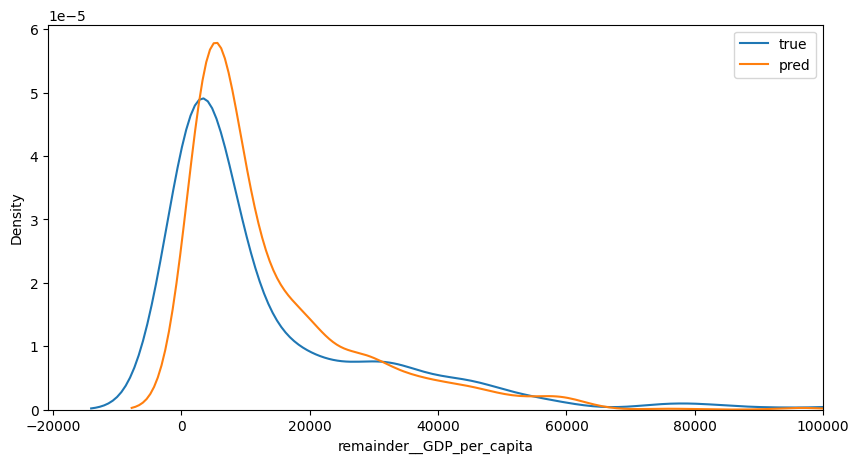

In [49]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_test['remainder__GDP_per_capita'], label = 'true')
sns.kdeplot(y_pred[0], label = 'pred')
plt.xlim(xmax=10e4)
plt.legend()

## Train with a linear regression model

In [50]:
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [51]:
model.score(X_test,y_test)

0.49167674211278756

### Train on Polynomial linear Regression model

In [52]:
from sklearn.preprocessing import PolynomialFeatures
Poly_model = PolynomialFeatures(degree=3)
                               
                               
                               
X_poly = Poly_model.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)


LinearRegression()

In [53]:
y_pred = model.predict(X_poly)

In [54]:
from sklearn.metrics import r2_score
r2_score_train=r2_score(y_train,y_pred)
r2_score_train

0.7740543355929732

In [55]:
X_test_poly = Poly_model.fit_transform(X_test)

In [56]:
y_test_pred = model.predict(X_test_poly)
r2_score_test =r2_score(y_test,y_test_pred)
r2_score_test

0.6503670859263968

### Root mean square error

In [57]:
import math
MSE = np.square(np.subtract(y_test,y_test_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

10837.578955168596


### Mean absolute error

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_test_pred)


4999.548709552762

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [60]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)

                        variables       VIF
0         scale__net_elec_imports  1.626147
1    scale__hydro_elec_per_capita  2.904205
2      scale__nuclear_electricity  2.995661
3  scale__biofuel_elec_per_capita  1.578086
4    scale__solar_elec_per_capita  1.385373
5     scale__wind_elec_per_capita  1.745596
6   scale__low_carbon_electricity  2.967554
7   scale__per_capita_electricity  4.279935


## Same process with the base model

In [39]:
full_cleaned_base=pd.read_csv('full_cleaned_final.csv')

In [40]:
modelb1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_base).fit()

print(modelb1.params)

Intercept                     12820.448548
scale__biofuel_electricity    77719.239021
dtype: float64


In [41]:
modelb2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_base).fit()

print(modelb2.params)

Intercept                   13295.620588
scale__hydro_electricity    29893.346732
dtype: float64
